<a href="https://colab.research.google.com/github/Jrets/IntrToNeuralNetworks/blob/main/HW3_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Практическое задание

  1. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора)  на датасет from sklearn.datasets import load_boston. 

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
print("есть ли доступные GPU: ")
print(tf.config.experimental.list_physical_devices("GPU"))

есть ли доступные GPU: 
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
x = tf.random.uniform([3, 3])
print("тензор на GPU #0:  "),
print(x.device.endswith('GPU:0'))

тензор на GPU #0:  
True


In [ ]:
from sklearn.datasets import load_boston

In [ ]:
boston_dataset = load_boston()#.copy()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [ ]:
print(boston_dataset.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [ ]:
df_boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
df_boston.describe()#.transpose()#[['mean', 'std']]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [ ]:
df_boston['RAD'].unique(), df_boston['CHAS'].unique(), df_boston['ZN'].unique()

(array([ 1.,  2.,  3.,  5.,  4.,  8.,  6.,  7., 24.]),
 array([0., 1.]),
 array([ 18. ,   0. ,  12.5,  75. ,  21. ,  90. ,  85. , 100. ,  25. ,
         17.5,  80. ,  28. ,  45. ,  60. ,  95. ,  82.5,  30. ,  22. ,
         20. ,  40. ,  55. ,  52.5,  70. ,  34. ,  33. ,  35. ]))

In [ ]:
def create_dummies(dataset, column):
  dataset[column] = 


In [ ]:
df_boston['CHAS'] = df_boston['CHAS'].map({1: 'CHAS_1', 0: 'CHAS_0'})
df_boston = pd.get_dummies(df_boston, columns=['CHAS'], prefix='', prefix_sep='')

In [ ]:
df_boston['RAD'] = df_boston['RAD'].map({1: 'RAD_1', 2: 'RAD_2', 3: 'RAD_3', 4: 'RAD_4', 5: 'RAD_5', 6: 'RAD_6', 7: 'RAD_7', 24: 'RAD_24'})
df_boston = pd.get_dummies(df_boston, columns=['RAD'], prefix='', prefix_sep='')

In [ ]:
df_boston.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,...,CHAS_0,CHAS_1,RAD_1,RAD_2,RAD_24,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,...,1,0,1,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,...,1,0,0,1,0,0,0,0,0,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,...,1,0,0,1,0,0,0,0,0,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,...,1,0,0,0,0,1,0,0,0,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
df_boston.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,...,CHAS_0,CHAS_1,RAD_1,RAD_2,RAD_24,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,...,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,...,0.930830,0.069170,0.039526,0.047431,0.260870,0.075099,0.217391,0.227273,0.051383,0.033597
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,...,0.253994,0.253994,0.195035,0.212769,0.439543,0.263812,0.412879,0.419485,0.220997,0.180367
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
CHAS_0       uint8
CHAS_1       uint8
RAD_1        uint8
RAD_2        uint8
RAD_24       uint8
RAD_3        uint8
RAD_4        uint8
RAD_5        uint8
RAD_6        uint8
RAD_7        uint8
dtype: object

In [ ]:
df_boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
NOX        0
RM         0
AGE        0
DIS        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
CHAS_0     0
CHAS_1     0
RAD_1      0
RAD_2      0
RAD_24     0
RAD_3      0
RAD_4      0
RAD_5      0
RAD_6      0
RAD_7      0
dtype: int64

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
#Предобработка : разибение на трейн-тест, нормализация для повышения качества обучения
#X = boston_dataset.data
X = df_boston
y= boston_dataset.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [ ]:
normalizer.adapt(np.array(X_train))

In [ ]:
print(normalizer.mean.numpy())

[[3.7580421e+00 1.1238786e+01 1.1228997e+01 5.5776674e-01 6.2774992e+00
  6.8334030e+01 3.8001893e+00 4.1006067e+02 1.8451187e+01 3.5482700e+02
  1.2661371e+01 9.3667531e-01 6.3324533e-02 4.2216353e-02 4.2216357e-02
  2.6121369e-01 6.3324533e-02 2.1635883e-01 2.3746701e-01 4.7493402e-02
  3.9577838e-02]]


In [ ]:
first = np.array(X_train[:1])

with np.printoptions(precision=2, suppress=True):
 print('First example:', first)
 print()
 print('Normalized:', normalizer(first).numpy())

First example: [[  0.06   0.    12.83   0.44   6.23  53.7    5.01 398.    18.7  386.4
   12.34   1.     0.     0.     0.     0.     0.     0.     1.     0.
    0.  ]]

Normalized: [[-0.41 -0.49  0.23 -1.02 -0.06 -0.51  0.56 -0.07  0.12  0.34 -0.04  0.26
  -0.26 -0.21 -0.21 -0.59 -0.26 -0.53  1.79 -0.22 -0.2 ]]


In [ ]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [ ]:
linear_model.predict(X_train[:10])

1/1 [==============================] - 0s 39ms/step


array([[-0.7268609 ],
       [-0.21470588],
       [ 1.1365969 ],
       [-0.16524091],
       [-1.855647  ],
       [ 0.65817374],
       [-2.2783349 ],
       [-3.16192   ],
       [ 1.4091811 ],
       [-1.271514  ]], dtype=float32)

In [ ]:
linear_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(21, 1) dtype=float32, numpy=
array([[ 0.14794695],
       [-0.13813019],
       [-0.02543691],
       [-0.48527738],
       [-0.06989583],
       [ 0.34794867],
       [ 0.04870993],
       [-0.09933385],
       [ 0.47147757],
       [-0.45568246],
       [ 0.33126283],
       [ 0.30417216],
       [-0.2212938 ],
       [-0.21674696],
       [-0.15381423],
       [ 0.14952397],
       [ 0.08302504],
       [ 0.37689722],
       [-0.44948548],
       [ 0.00536102],
       [ 0.33470213]], dtype=float32)>

In [ ]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = linear_model.fit(
    X_train,
    y_train,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 4.75 s, sys: 427 ms, total: 5.17 s
Wall time: 5.43 s


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

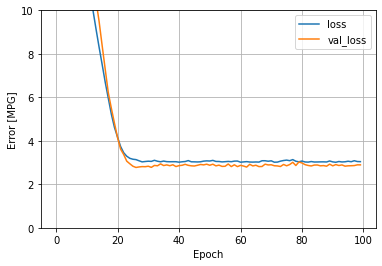

In [ ]:
plot_loss(history)

In [ ]:
#linear_model = tf.keras.Sequential([
#    normalizer,
#    layers.Dense(units=1)
#])

In [ ]:
mean = X_train.mean(axis=0)
X_train -= mean

In [ ]:
std = X_train.std(axis=0)
X_train /= std

In [ ]:
def norm(x):
  return (x - mean) / std


In [ ]:
X_train = norm(X_train);
X_test = norm(X_test);

In [ ]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,-0.405853,-0.494182,-1.609906,-0.276590,-4.695059,-9.044189,-2.376578,-1.818960,-1.091305,-2.402501,-8.475971,-4.347275,-1.726095
std,0.114431,0.042596,0.146113,3.882507,8.497134,1.439929,0.034942,0.470512,0.116970,0.005974,0.461054,0.012015,0.136872
min,-0.452212,-0.515232,-1.835313,-1.350454,-16.792108,-14.683817,-2.456081,-2.423092,-1.205272,-2.410180,-9.705460,-4.399462,-1.929940
25%,-0.451210,-0.515232,-1.734333,-1.350454,-12.243427,-9.881830,-2.407730,-2.209824,-1.164227,-2.406968,-8.791406,-4.345096,-1.835052
50%,-0.449164,-0.515232,-1.662387,-1.350454,-6.178519,-9.249444,-2.365241,-1.930230,-1.150545,-2.405112,-8.387522,-4.342990,-1.751591
75%,-0.412438,-0.488016,-1.458719,-1.350454,0.463999,-8.347517,-2.345034,-1.510512,-1.109499,-2.393084,-8.089923,-4.342245,-1.645369
max,0.712793,-0.333790,-1.252915,13.723410,18.297717,-3.862760,-2.337525,0.009783,-0.890589,-2.391477,-7.707295,-4.342210,-1.251017


In [ ]:
# Приводим значения ответов в диапазон от 0 до 1
min_y = y_train.min()
max_y = y_train.max() - min_y #"опустим" максимум на min_y
y_train = (y_train - min_y) / max_y #отклонение от минимума к амплитуде
y_test = (y_test - min_y) / max_y

In [ ]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,-0.405853,-0.494182,-1.609906,-0.276590,-4.695059,-9.044189,-2.376578,-1.818960,-1.091305,-2.402501,-8.475971,-4.347275,-1.726095
std,0.114431,0.042596,0.146113,3.882507,8.497134,1.439929,0.034942,0.470512,0.116970,0.005974,0.461054,0.012015,0.136872
min,-0.452212,-0.515232,-1.835313,-1.350454,-16.792108,-14.683817,-2.456081,-2.423092,-1.205272,-2.410180,-9.705460,-4.399462,-1.929940
25%,-0.451210,-0.515232,-1.734333,-1.350454,-12.243427,-9.881830,-2.407730,-2.209824,-1.164227,-2.406968,-8.791406,-4.345096,-1.835052
50%,-0.449164,-0.515232,-1.662387,-1.350454,-6.178519,-9.249444,-2.365241,-1.930230,-1.150545,-2.405112,-8.387522,-4.342990,-1.751591
75%,-0.412438,-0.488016,-1.458719,-1.350454,0.463999,-8.347517,-2.345034,-1.510512,-1.109499,-2.393084,-8.089923,-4.342245,-1.645369
max,0.712793,-0.333790,-1.252915,13.723410,18.297717,-3.862760,-2.337525,0.009783,-0.890589,-2.391477,-7.707295,-4.342210,-1.251017


In [ ]:
layer_list = list(range(3,11))
#neuron_list = list(range(10,500, 20))
neuron_list = [10, 25, 50, 100, 200, 400]
activations_list = ["relu", "linear", "softmax"]
optimizator_list = ["Adadelta","adam"] #"sgd",

In [ ]:
import itertools

params_list = list(itertools.product(layer_list, neuron_list, activations_list, optimizator_list))
params_list[:2]

[(3, 10, 'relu', 'Adadelta'), (3, 10, 'relu', 'adam')]

In [ ]:
def get_best_params(num_layer = None , num_neuron = None, f_acrivation = None, name_optimizator = None):
  model = Sequential()
  model.add(Dense(50, activation='relu'))
  for _n in range(num_layer):
    model.add(Dense(num_neuron, activation=f_acrivation))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(1))
  model.compile(loss='mse', optimizer=name_optimizator, metrics=["mse", "msle"])
  return model

In [ ]:
rez_list = []

In [ ]:
for i in range(len(params_list)):
    print(params_list[i][0])
    print(params_list[i][1])
    print(params_list[i][2])
    print(params_list[i][3])      
    model = get_best_params(params_list[i][0], params_list[i][1], params_list[i][2], params_list[i][3])
    #print(rez_funk)
    row_rez_list = []
    #row_rez_list = list(params_list[i][0], params_list[i][1], params_list[i][2], params_list[i][3])
    row_rez_list.append(params_list[i][0])
    row_rez_list.append(params_list[i][1])
    row_rez_list.append(params_list[i][2])
    row_rez_list.append(params_list[i][3])
    early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=10)

    model.fit(X_train, y_train, epochs=100, callbacks=[early_stop], validation_data=[X_test, y_test], verbose=0)

    predictions = model.predict(X_test)

    y_train_predict = model.predict(X_train)
    
    r2_tr = r2_score(y_train, y_train_predict)
    row_rez_list.append(r2_tr)
    
    y_test_predict = model.predict(X_test)
    
    r2_ts = r2_score(y_test, y_test_predict)
    row_rez_list.append(r2_ts)
    print(row_rez_list)

    rez_list.append(row_rez_list)

3
10
relu
Adadelta
4/4 [==============================] - 0s 3ms/step
[3, 10, 'relu', 'Adadelta', 0.48178471988606664, -1.5240792491768715]
3
10
relu
adam
4/4 [==============================] - 0s 3ms/step
[3, 10, 'relu', 'adam', 0.8412570909039758, 0.4332928546888333]
3
10
linear
Adadelta
4/4 [==============================] - 0s 3ms/step
[3, 10, 'linear', 'Adadelta', 0.48571647859310496, -6.437477383635583]
3
10
linear
adam
4/4 [==============================] - 0s 3ms/step
[3, 10, 'linear', 'adam', 0.7722084765361281, -3.1552453016716884]
3
10
softmax
Adadelta
4/4 [==============================] - 0s 3ms/step
[3, 10, 'softmax', 'Adadelta', -0.14687718781299264, -0.14505507368493942]
3
10
softmax
adam
4/4 [==============================] - 0s 3ms/step
[3, 10, 'softmax', 'adam', 0.765270370938524, 0.09363615917048862]
3
25
relu
Adadelta
4/4 [==============================] - 0s 3ms/step
[3, 25, 'relu', 'Adadelta', -1.1175154767317825, -2.6686966205472737]
3
25
relu
adam
4/4 [========

In [ ]:
rez_list

[[3, 10, 'relu', 'Adadelta', 0.48178471988606664, -1.5240792491768715],
 [3, 10, 'relu', 'adam', 0.8412570909039758, 0.4332928546888333],
 [3, 10, 'linear', 'Adadelta', 0.48571647859310496, -6.437477383635583],
 [3, 10, 'linear', 'adam', 0.7722084765361281, -3.1552453016716884],
 [3, 10, 'softmax', 'Adadelta', -0.14687718781299264, -0.14505507368493942],
 [3, 10, 'softmax', 'adam', 0.765270370938524, 0.09363615917048862],
 [3, 25, 'relu', 'Adadelta', -1.1175154767317825, -2.6686966205472737],
 [3, 25, 'relu', 'adam', 0.8058815234022054, -0.5487832560614068],
 [3, 25, 'linear', 'Adadelta', 0.4707934757663417, -14.083130413803206],
 [3, 25, 'linear', 'adam', 0.7838652277223359, -0.5462061269530791],
 [3, 25, 'softmax', 'Adadelta', -0.14920970350769225, -0.1456119819401389],
 [3, 25, 'softmax', 'adam', 0.6975136886890725, -0.06121131619564779],
 [3, 50, 'relu', 'Adadelta', 0.6530813534368297, -2.0972845721265947],
 [3, 50, 'relu', 'adam', 0.7755244267530811, -1.4788332221686087],
 [3, 50,